In [1]:
import tifffile as tf
import matplotlib.pyplot as plt

d0 = r'./ExampleHuman/images/AS_09125_050116030001_D03f00d0.tif'
d1 = r'./ExampleHuman/images/AS_09125_050116030001_D03f00d1.tif'
d2 = r'./ExampleHuman/images/AS_09125_050116030001_D03f00d2.tif'

In [2]:
image_d0 = tf.imread(d0)
image_d1 = tf.imread(d1)
image_d2 = tf.imread(d2)

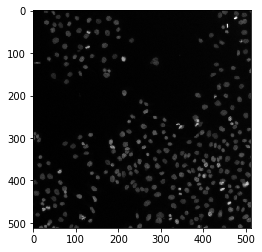

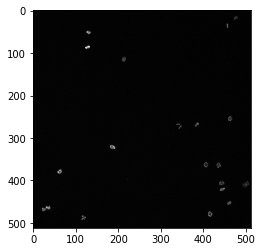

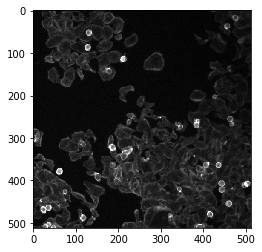

In [3]:
plt.imshow(image_d0, cmap="gray")
plt.show()
plt.imshow(image_d1, cmap="gray")
plt.show()
plt.imshow(image_d2, cmap="gray")
plt.show()

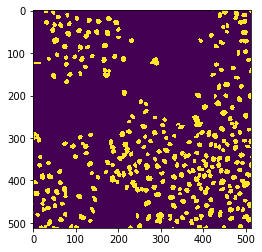

247


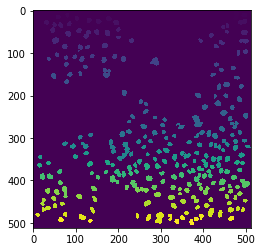

In [4]:
## global strategy for nuclei
# li thresholding

from scipy import ndimage as ndi
from skimage import filters
from skimage import morphology

thresh = filters.threshold_li(image_d0)
binary_d0 = image_d0 > thresh

plt.imshow(binary_d0)
plt.show()

#discard small object
d0_cleaned = morphology.remove_small_objects(binary_d0,8)

#discard nuclei touching border
from skimage.segmentation import clear_border
d0_cleaned = clear_border(d0_cleaned)
plt.imshow(d0_cleaned)

#labels nuclei
labeled_d0, nb_labels = ndi.label(d0_cleaned)
print(nb_labels)
plt.imshow(labeled_d0)


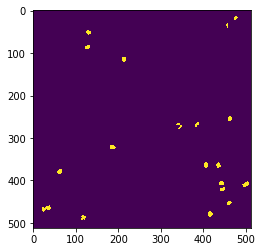

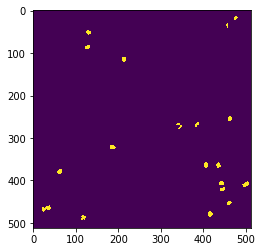

In [5]:
## global strategy for nuclei
# li thresholding
from skimage import filters
from skimage import morphology

thresh = filters.threshold_li(image_d1)
binary_d1 = image_d1 > thresh

plt.imshow(binary_d1)
plt.show()

#discard small object
d1_cleaned = morphology.remove_small_objects(binary_d1,8)

#discard nuclei touching border
from skimage.segmentation import clear_border
d1_cleaned = clear_border(d1_cleaned)
plt.imshow(d1_cleaned)


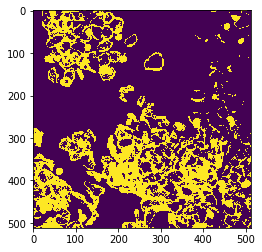

In [47]:
from skimage import filters

thresh = filters.threshold_otsu(image_d2)
binary_d2 = image_d2 > thresh
plt.imshow(binary_d2)
plt.show()